Import pandas library in order to read the dataset from the .CSV file

In [1]:
 import pandas as pd

Let's read the dataset and see what the first few values look like

In [2]:
df = pd.read_csv('mill.csv')

df.head()

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


I am interested to see the dataset sorted based on the case number, and then each experiement sorted as a coherent time series. So that It is more comfortable for me to carry on with future analysis

In [3]:
df.sort_values(['case', 'time'])

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,row_162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,row_163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,row_164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,row_165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


I will drop the follwing columns: VB, smcAC, and run. 

VB is not relevant for forecasting and anomaly detection.

smcAC is the AC spindle current. I already have smcDC, which is the DC for the spindle. So, I can easily observe the effect of feed force just from smcDC, making smcDC redundant.

run follows the same trend as time, making it redundant. 

In [4]:
df.drop(columns = ['VB', 'smcAC', 'run'])


,Unnamed: 0,case,time,DOC,feed,material,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,row_0,1,2,1.5,0.5,1,0.625000,0.078125,0.314941,0.087280,0.103760
1,row_1,1,4,1.5,0.5,1,0.668945,0.075684,0.301514,0.086670,0.099487
2,row_2,1,6,1.5,0.5,1,0.913086,0.083008,0.295410,0.092773,0.104980
3,row_3,1,7,1.5,0.5,1,0.131836,0.083008,0.316162,0.112915,0.139771
4,row_4,1,11,1.5,0.5,1,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...
162,row_162,16,2,1.5,0.5,2,1.308594,0.063477,0.330811,0.093994,0.109253
163,row_163,16,3,1.5,0.5,2,1.406250,0.065918,0.279541,0.114746,0.139771
164,row_164,16,4,1.5,0.5,2,1.328125,0.063477,0.290527,0.101318,0.117798
165,row_165,16,6,1.5,0.5,2,1.381836,0.068359,0.289307,0.098877,0.114746


Let's see which experiment settings ran the longest, and which experiments ended really quickly.

<AxesSubplot:>

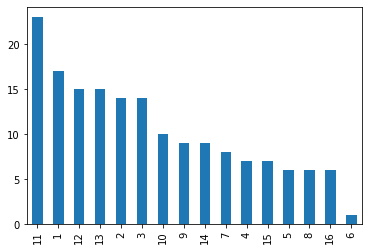

In [5]:
df['case'].value_counts().plot.bar()

It can be observed that case 11 has the longest experiment run time. It totally makes sense from a machining point view. 

The depth of cut is on the lower end for this case (0.75). A lower depth of cut means lesser cutting forces, which means the tool will wear out at a slower rate.

The feed value is at the lower end (0.25). With lower feed values, lesser dynamic forces are generated, which will also reduce the wear rate of the tool. 

Finally, the material of the cutting tool for case 11 is cast iron (1). Cast iron is capable of absorbing more shocks as compared to steel owing to higher carbon content. With more shock absorption capability, the cutting tool is able to absorb dynamic loads better and as a results lasts longer. 

The same reasoning can be also be observed in the case of case 16 (the case with shortest run-time, case 6 is ignored because it has only one data point and is statistically irrelevant).

The cutting depth is higher (1.5), the feed rate is higher (0.5), and the material is steel (2). As a result, this tool wears out much quicker than the one used in case 11.

Let's take a closer look at the longest run time case (case 11).

In [6]:
df2 = df.loc[df['case'] == 11]
df2

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
71,row_71,11,1,0.00,1,0.75,0.25,1,-0.244141,1.352539,0.070801,0.289307,0.126953,0.164185
72,row_72,11,2,0.04,3,0.75,0.25,1,-0.654297,1.313477,0.070801,0.301514,0.149536,0.181274
73,row_73,11,3,0.07,10,0.75,0.25,1,-0.214844,1.411133,0.070801,0.269775,0.092773,0.121460
74,row_74,11,4,0.07,12,0.75,0.25,1,0.263672,1.391602,0.061035,0.286865,0.098877,0.115356
75,row_75,11,5,0.08,14,0.75,0.25,1,-0.605469,1.342773,0.065918,0.296631,0.121460,0.144653
76,row_76,11,6,0.09,17,0.75,0.25,1,0.341797,1.411133,0.070801,0.284424,0.101929,0.123901
77,row_77,11,7,NaN,19,0.75,0.25,1,0.214844,1.406250,0.068359,0.274658,0.085449,0.101318
78,row_78,11,8,0.12,21,0.75,0.25,1,-0.366211,1.416016,0.065918,0.321045,0.096436,0.115356
79,row_79,11,9,0.16,27,0.75,0.25,1,-0.678711,1.352539,0.063477,0.294189,0.106812,0.127563
80,row_80,11,10,0.18,33,0.75,0.25,1,-0.463867,1.381836,0.070801,0.290527,0.100708,0.122681


Let's drop VB, smcAC, and run for reasons described above.

In [7]:
df2.drop(columns = ['VB', 'smcAC', 'run'])

,Unnamed: 0,case,time,DOC,feed,material,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
71,row_71,11,1,0.75,0.25,1,1.352539,0.070801,0.289307,0.126953,0.164185
72,row_72,11,3,0.75,0.25,1,1.313477,0.070801,0.301514,0.149536,0.181274
73,row_73,11,10,0.75,0.25,1,1.411133,0.070801,0.269775,0.092773,0.121460
74,row_74,11,12,0.75,0.25,1,1.391602,0.061035,0.286865,0.098877,0.115356
75,row_75,11,14,0.75,0.25,1,1.342773,0.065918,0.296631,0.121460,0.144653
76,row_76,11,17,0.75,0.25,1,1.411133,0.070801,0.284424,0.101929,0.123901
77,row_77,11,19,0.75,0.25,1,1.406250,0.068359,0.274658,0.085449,0.101318
78,row_78,11,21,0.75,0.25,1,1.416016,0.065918,0.321045,0.096436,0.115356
79,row_79,11,27,0.75,0.25,1,1.352539,0.063477,0.294189,0.106812,0.127563
80,row_80,11,33,0.75,0.25,1,1.381836,0.070801,0.290527,0.100708,0.122681


Let us plot the different variables and see how they are behaving as a function of time

In [8]:
import matplotlib.pyplot as plt

In [9]:
plot_cols = ['smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

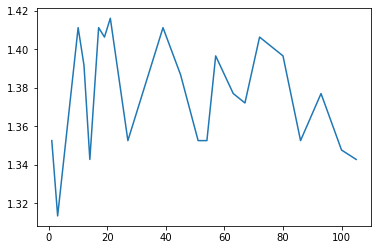

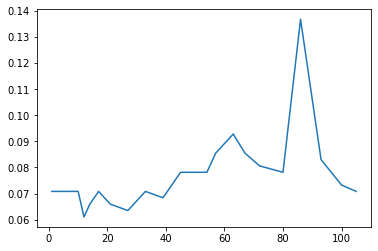

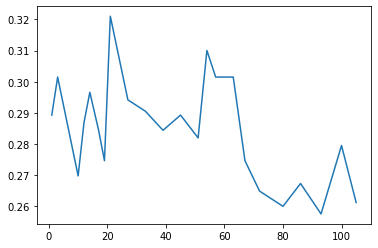

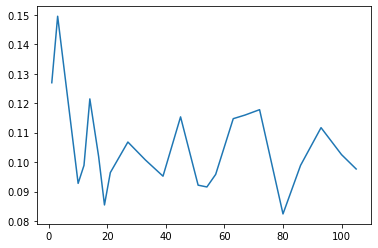

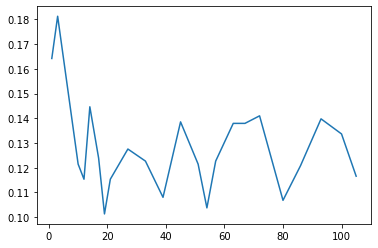

In [10]:
for col in plot_cols:
    plt.plot(df2['time'], df2[col])
    plt.show()

The behavior of acoustic emission sensors at the spindle and the table look somewhat similar. Let's take a closer look. 

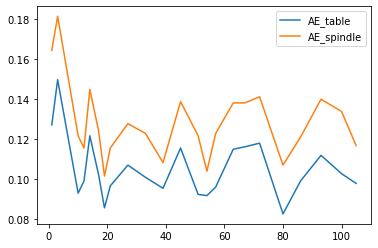

In [11]:
plt.plot(df2['time'], df2['AE_table'], label = 'AE_table')
plt.plot(df2['time'], df2['AE_spindle'], label = 'AE_spindle')
plt.legend()
plt.show()


It can be inferred from the graphs that acousti emissions experienced by both the sensors are more or less the same in trend. The acoustic emission sensor at the spindle experiences more in magnitude. This makes sense since it is much more closer to where the actual machining is taking place, versus the table sensor which is placed at a farther position. 

Let's try to forecast the spindle vibration of case 11. 

Let us see how the spindle vibration (vib_spindle) time series looks like 

In [12]:
df3_vib_spindle = df2.loc[:, ['time', 'vib_spindle']]

df3_vib_spindle


,time,vib_spindle
71,1,0.289307
72,3,0.301514
73,10,0.269775
74,12,0.286865
75,14,0.296631
76,17,0.284424
77,19,0.274658
78,21,0.321045
79,27,0.294189
80,33,0.290527


It can be observed that the time series is irregular (observations recorded at irregular time periods). To analyze the time series, it ideal to convert the irregular time series into a regular time series. 

Converting the existing time series into the pandas' date-time format.

In [13]:
df3_vib_spindle.set_index(pd.to_datetime(df3_vib_spindle['time'], unit='s'), inplace=True)
df3_vib_spindle.drop('time', axis=1, inplace=True)


In [14]:
df3_vib_spindle

,vib_spindle
time,
1970-01-01 00:00:01,0.289307
1970-01-01 00:00:03,0.301514
1970-01-01 00:00:10,0.269775
1970-01-01 00:00:12,0.286865
1970-01-01 00:00:14,0.296631
1970-01-01 00:00:17,0.284424
1970-01-01 00:00:19,0.274658
1970-01-01 00:00:21,0.321045
1970-01-01 00:00:27,0.294189


Now, the time series will be converted to a time series with regular intervals via the 'resample' method. The time series is converted to a series with time period as 1 second. The intermediate gaps are filled with the linear interpolation numerical method.

In [15]:
df3_vib_spindle_resampled = df3_vib_spindle.resample('1S').interpolate(method = 'linear')

df3_vib_spindle_resampled

,vib_spindle
time,
1970-01-01 00:00:01,0.289307
1970-01-01 00:00:02,0.295410
1970-01-01 00:00:03,0.301514
1970-01-01 00:00:04,0.296980
1970-01-01 00:00:05,0.292446
...,...
1970-01-01 00:01:41,0.275879
1970-01-01 00:01:42,0.272217
1970-01-01 00:01:43,0.268555


Let's see how the resampled time series looks like. 

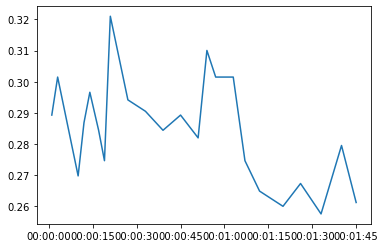

In [16]:
plt.plot(df3_vib_spindle_resampled['vib_spindle'] )

Let us see if the time series has some seasonal or residual components to it via additive seasonal decomposition

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
vib_spindle_seasonal_decomp = seasonal_decompose(df3_vib_spindle_resampled['vib_spindle'], model = 'additive',period = 1)

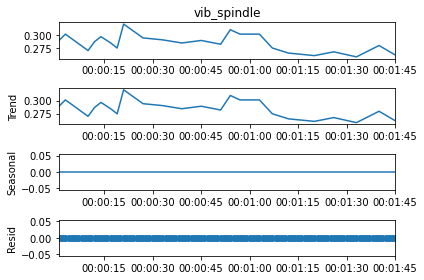

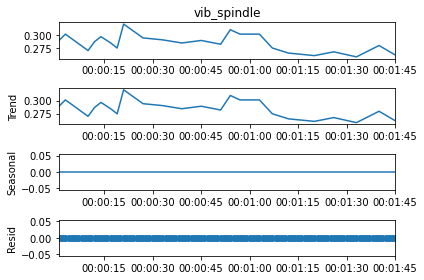

In [19]:
vib_spindle_seasonal_decomp.plot()

We can see that there is no seasonal or residual component to this time series. 

In order to evaluate a forecasting model, it is a good idea to compare it to a baseline forecasting model. In the following steps, a baseline forecasting model is made on the basis of the historical training set's mean. 

Splitting the time series into a training set and test set (80:20) split.

In [20]:
train = df3_vib_spindle_resampled[: 84]
test = df3_vib_spindle_resampled[84 :]


In [21]:
import numpy as np

In [22]:
historical_mean = np.mean(train['vib_spindle'])

historical_mean

0.28641473679315477

In [23]:
test.loc[:, 'pred_mean'] = historical_mean

C:\Users\ragha\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Mean average percentage is a great metric to evaluate our baseline mean value model. Let's write a function to calculate it between our true and predicted values.  

In [24]:
def mape(y_true, y_pred):
    
    return np.mean((np.abs(y_true - y_pred)/y_true)) * 100

In [25]:
mape_hist_mean = mape(test['vib_spindle'], test['pred_mean'])
print(mape_hist_mean)

7.470053126994514


The Mean average percentage error for our baseline mean-value model is 7.47%

Let us visualize our model

[]

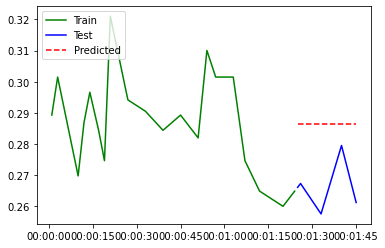

In [26]:
fig, ax = plt.subplots()

ax.plot(train['vib_spindle'], 'g-', label = 'Train')
ax.plot(test['vib_spindle'], 'b-', label = 'Test')
ax.plot(test['pred_mean'], 'r--', label = 'Predicted')
ax.legend(loc = 2)

plt.plot()

It can be observed from the graph that the trend is decreasing over a period of time. So, the baseline model based on the mean of the training set might not be the optimum baseline model. Let;s make a baseline model based on the last value of the training set.

In [27]:
last = train['vib_spindle'].iloc[-1]

last

0.264892578125

In [28]:
test.loc[:, 'pred_last'] = last

In [29]:
mape_last = mape(test['vib_spindle'], test['pred_last'])

mape_last

1.7743801818596072

The new baseline model performs better than the historical mean baseline model with an improved mean average percentage error of 1.77%

Let us plot the new baseline model

[]

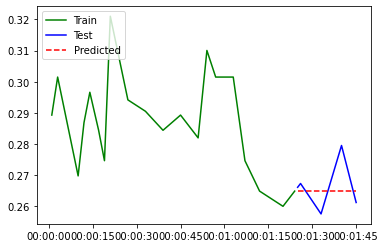

In [30]:
fig, ax = plt.subplots()

ax.plot(train['vib_spindle'], 'g-', label = 'Train')
ax.plot(test['vib_spindle'], 'b-', label = 'Test')
ax.plot(test['pred_last'], 'r--', label = 'Predicted')
ax.legend(loc = 2)

plt.plot()

Let us see if we can make a forecasting model that outperforms our baseline. Before that let's do some statistical analyses, namely performing the ad-fuller test and determining the p-value of the time series as a function of time. The goal is to determine whether the time series is stationary or not.

Let's determine the ad-fuller statistics and the p-value for our time-series

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
ADF_result = adfuller(df3_vib_spindle_resampled['vib_spindle'])
print(f'ADF statistic: {ADF_result[0]}' )
print(f'p-value: {ADF_result[1]}' )

ADF statistic: -1.9066453259812026
p-value: 0.32894142658345893


Since the p-value is greater than 0.05, we have failed to reject the null-hypothesis that the time series is stationary, meaning the time series is non-stationary.

In an attempt to make it stationary, let's do first-order differencing.

In [33]:
#First order differencing
df4 = df3_vib_spindle_resampled['vib_spindle'].diff()

df4

df4 = df4[1:]


In [34]:
df4

time
1970-01-01 00:00:02    0.006104
1970-01-01 00:00:03    0.006104
1970-01-01 00:00:04   -0.004534
1970-01-01 00:00:05   -0.004534
1970-01-01 00:00:06   -0.004534
                         ...   
1970-01-01 00:01:41   -0.003662
1970-01-01 00:01:42   -0.003662
1970-01-01 00:01:43   -0.003662
1970-01-01 00:01:44   -0.003662
1970-01-01 00:01:45   -0.003662
Freq: S, Name: vib_spindle, Length: 104, dtype: float64

In [35]:
df4 = df4.to_frame().reset_index()

In [36]:
df4 = df4.rename(columns = {0: 'list'})
df4.index.name = 'index'

In [37]:
df4

,time,vib_spindle
index,,
0,1970-01-01 00:00:02,0.006104
1,1970-01-01 00:00:03,0.006104
2,1970-01-01 00:00:04,-0.004534
3,1970-01-01 00:00:05,-0.004534
4,1970-01-01 00:00:06,-0.004534
...,...,...
99,1970-01-01 00:01:41,-0.003662
100,1970-01-01 00:01:42,-0.003662
101,1970-01-01 00:01:43,-0.003662


The p-value has gotten really low. Which means our time-series is now stationary. Now, we can use it for further analysis.

In [38]:

ADF_result_diff = adfuller(df4['vib_spindle'])
print(f'ADF statistic: {ADF_result_diff[0]}' )
print(f'p-value: {ADF_result_diff[1]}' )

ADF statistic: -7.295304581462539
p-value: 1.3829646588434805e-10


Plotting the Autocorrelation function

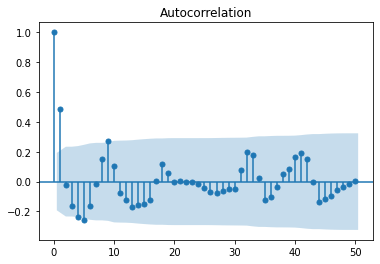

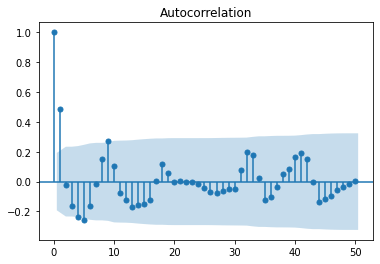

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df4['vib_spindle'], lags = 50)

There is first order correlation as per the graph above. 

Let us now perform forecasting using a moving average model. Splitting the dataset into a training and test set using a 80:20 split.

In [40]:
train_diff = df4[: (int(len(df4)*0.8))]
test_diff = df4[(int(len(df4)*0.8)) :]

print(len(train_diff))
print(len(test_diff))

83
21


In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [42]:
def rolling_forecast(df:pd.DataFrame, train_len: int, horizon: int, window: int):
    
    total_len = train_len + horizon
    
    pred_MA = []
    
    for i in range(train_len, total_len, window):
        model = SARIMAX(df[:i], order = (0,0,1))
        res = model.fit(disp = False)
        predictions = res.get_prediction(0, i + window - 1)
        oos_pred = predictions.predicted_mean.iloc[-window:]
        pred_MA.extend(oos_pred)
        
    return pred_MA

In [43]:
pred_df = test_diff.copy()

train_len = len(train_diff)

horizon = len(test_diff)

window = 1

pred_MA = rolling_forecast(df4['vib_spindle'], train_len, horizon, window)

pred_df['pred_MA'] = pred_MA

pred_df.head()

C:\Users\ragha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ragha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ragha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ragha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ragha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

,time,vib_spindle,pred_MA
index,,,
83,1970-01-01 00:01:25,0.001221,0.000347
84,1970-01-01 00:01:26,0.001221,0.000574
85,1970-01-01 00:01:27,-0.001395,0.000425
86,1970-01-01 00:01:28,-0.001395,-0.001193
87,1970-01-01 00:01:29,-0.001395,-0.000132


In [44]:
len(pred_df)

21

In [45]:
df3_vib_spindle_resampled['prediction_MA'] = pd.Series()
df3_vib_spindle_resampled['prediction_MA'] [84 :] = df3_vib_spindle_resampled['vib_spindle'].iloc[84] + pred_df['pred_MA'].cumsum()   

C:\Users\ragha\AppData\Local\Temp/ipykernel_13200/991865699.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df3_vib_spindle_resampled['prediction_MA'] = pd.Series()


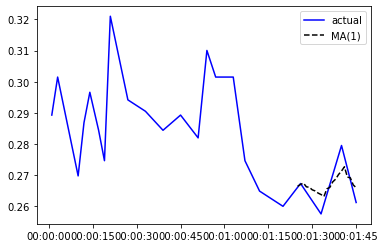

In [46]:
fig, ax = plt.subplots()

ax.plot(df3_vib_spindle_resampled['vib_spindle'], 'b-', label = 'actual')
ax.plot(df3_vib_spindle_resampled['prediction_MA'], 'k--', label = 'MA(1)')
ax.legend()


In [47]:
from sklearn.metrics import mean_absolute_percentage_error

In [48]:
mape_MA_undiff = mean_absolute_percentage_error(df3_vib_spindle_resampled['vib_spindle'].iloc[84 :],df3_vib_spindle_resampled['prediction_MA'][84:])

print(mape_MA_undiff)

0.011796312171518783


The mean average percentage error (MAPE) is 0.0118%, which is better performance than our baseline models. 

We are now interested to perform anomaly detection on the dataset. vib_table seems a good candidate as the anomaly is pretty visible from the graph. Let's try to detect it algorithmically.

Before we do that, we need to make the time series regular, just as we did before.

In [49]:
#Convert vib_table to a regular time series, and run anomaly detection stuff on it, for case 11

df5_vib_table = df2.loc[:, ['time', 'vib_table']]

df5_vib_table



,time,vib_table
71,1,0.070801
72,3,0.070801
73,10,0.070801
74,12,0.061035
75,14,0.065918
76,17,0.070801
77,19,0.068359
78,21,0.065918
79,27,0.063477
80,33,0.070801


In [50]:
df5_vib_table.set_index(pd.to_datetime(df5_vib_table['time'], unit='s'), inplace=True)
df5_vib_table.drop('time', axis=1, inplace=True)


In [51]:
df5_vib_table_resampled = df5_vib_table.resample('1S').interpolate(method = 'linear')

df5_vib_table_resampled

,vib_table
time,
1970-01-01 00:00:01,0.070801
1970-01-01 00:00:02,0.070801
1970-01-01 00:00:03,0.070801
1970-01-01 00:00:04,0.070801
1970-01-01 00:00:05,0.070801
...,...
1970-01-01 00:01:41,0.072754
1970-01-01 00:01:42,0.072266
1970-01-01 00:01:43,0.071777


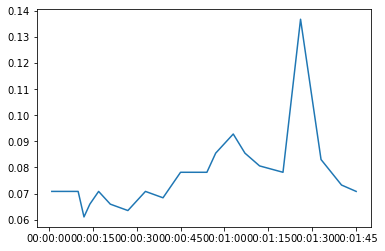

In [52]:
plt.plot(df5_vib_table_resampled['vib_table'] )

One of the popular machine learning algorithms for anomaly detection is the isolation forest algorithm. Its implemented as follows:

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [54]:
outlier_fraction = float(0.001)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df5_vib_table_resampled['vib_table'].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

model = IsolationForest(contamination = outlier_fraction)
model.fit(data)

IsolationForest(contamination=0.001)

Plotting the results, we get

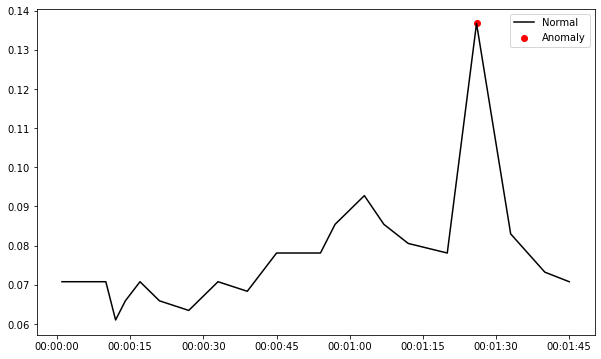

In [55]:
df5_vib_table_resampled['anomaly'] = model.predict(data)
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df5_vib_table_resampled.loc[df5_vib_table_resampled['anomaly'] == -1, ['vib_table']] #anomaly
ax.plot(df5_vib_table_resampled.index, df5_vib_table_resampled['vib_table'], color='black', label = 'Normal')
ax.scatter(a.index,a['vib_table'], color='red', label = 'Anomaly')
plt.legend()
plt.show();


We can see that the Isolation Forest algorithm was successful in detecting the anomaly in the time series.